In [2]:
from coredotfinance.data import KrxReader
import pandas as pd
import numpy as np
import requests
import lxml
from bs4 import BeautifulSoup
from requests import Response
import re
import matplotlib.pyplot as plt
from pykrx import stock
from pykrx import bond
import time
import math
import seaborn as sns
import plotly.express as px

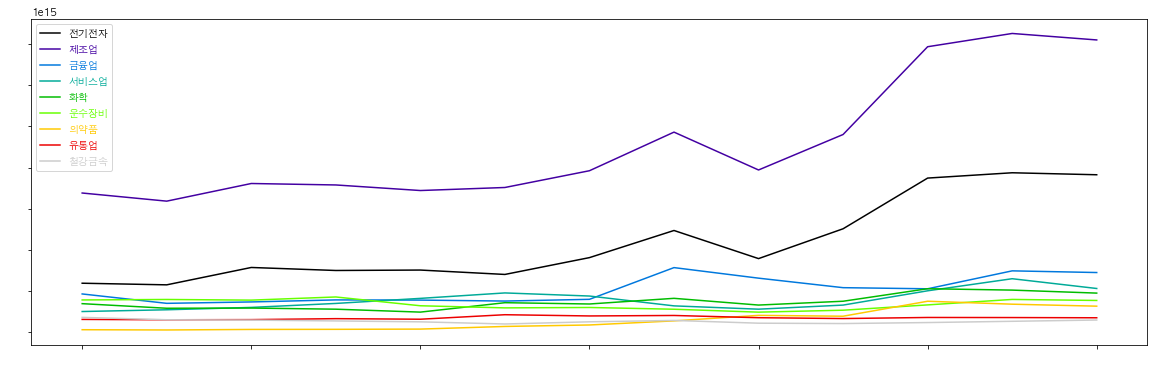

In [73]:
tickers = stock.get_index_ticker_list(market='KOSDAQ')
#'1001','1028','1034','1035'
# '1013', '1027', '1021', '1026', '1008', '1015', '1009', '1016', '1011'
#KOSPI_tickers = [ '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1024', '1025', '1026', '1027']
KOSPI_tickers = ['1013', '1027', '1021', '1026', '1008', '1015', '1009', '1016', '1011']
KOSDAQ_tickers = ['2012', '2015', '2024', '2026', '2027', '2029', '2031', '2037', '2041', '2042', '2043', '2056', '2058', '2062', '2063', '2065', '2066', '2067', '2068', '2070', '2072', '2074', '2075', '2077', '2151', '2152', '2153', '2154', '2155', '2156', '2157', '2158', '2159', '2160']

ticker_list = KOSPI_tickers
colormap = plt.cm.nipy_spectral
colors = [colormap(i) for i in np.linspace(0, 1, len(ticker_list))]
fig, ax1 = plt.subplots()

KOSPI_list = pd.DataFrame()
for index, ticker in enumerate(ticker_list):
    pdf = stock.get_index_portfolio_deposit_file(ticker)
    
    df = stock.get_index_ohlcv("20100501", "20220501", ticker, 'y')
    df = df[['상장시가총액']]
    df[df.columns.name] = df[['상장시가총액']]
    df = df.drop('상장시가총액', axis=1)
    plt.rcParams["figure.figsize"] = (20,6)
    plt.xticks(color='w')
    plt.yticks(color='w')
    ax1.plot(df.index.year, df[[df.columns.name]], label = df.columns.name, color = colors[index])
    KOSPI_list = pd.concat([KOSPI_list, df], axis = 1)

#df = stock.get_index_ohlcv("20100501", "20220501", '1001', 'y')
#ax2 = ax1.twinx()
#ax2.plot(df.index.year , df[['시가']], color = 'red',linewidth = 2.0, linestyle = "--")


ax1.legend(labelcolor='linecolor')
plt.rcParams['font.family'] = 'AppleGothic'
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

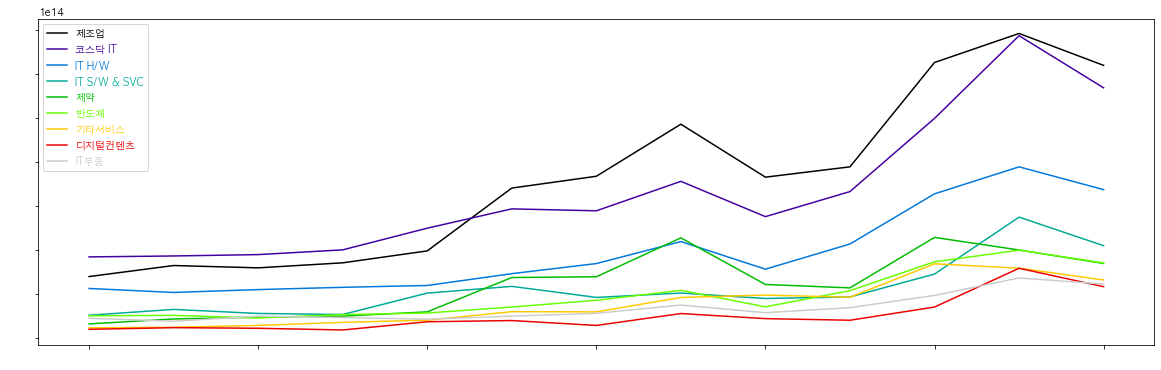

In [71]:

#KOSDAQ_tickers = ['2012', '2015', '2024', '2026', '2027', '2029', '2031', '2037', '2041', '2042', '2043', '2056', '2058', '2062', '2063', '2065', '2066', '2067', '2068', '2070', '2072', '2074', '2075', '2077', '2151', '2152', '2153', '2154', '2155', '2156', '2157', '2158', '2159', '2160']
KOSDAQ_tickers = ['2024', '2015', '2043', '2042', '2066', '2159', '2012', '2154', '2160']
ticker_list = KOSDAQ_tickers

colormap = plt.cm.nipy_spectral
colors = [colormap(i) for i in np.linspace(0, 1, len(ticker_list))]

fig, ax1 = plt.subplots()
KOSDAQ_list = pd.DataFrame()

for index, ticker in enumerate(ticker_list):
    pdf = stock.get_index_portfolio_deposit_file(ticker)
    df = stock.get_index_ohlcv("20100101", "20220228", ticker, 'y')
    df = df[['상장시가총액']]
    df[df.columns.name] = df[['상장시가총액']]
    df = df.drop('상장시가총액', axis=1)
    plt.xticks(color='w')
    plt.yticks(color='w')
    ax1.plot(df.index.year, df[[df.columns.name]], label = df.columns.name, color = colors[index])
    KOSDAQ_list = pd.concat([KOSDAQ_list, df], axis = 1)
ax1.legend(labelcolor='linecolor', loc='upper left')
 
# df = stock.get_index_ohlcv("20100101", "20220228", '2001', 'y')
# ax2 = ax1.twinx()
# ax2.plot(df.index.year, df[['시가']], color = 'red',linewidth = 2.0, linestyle = "--")   


plt.rcParams['font.family'] = 'AppleGothic'
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

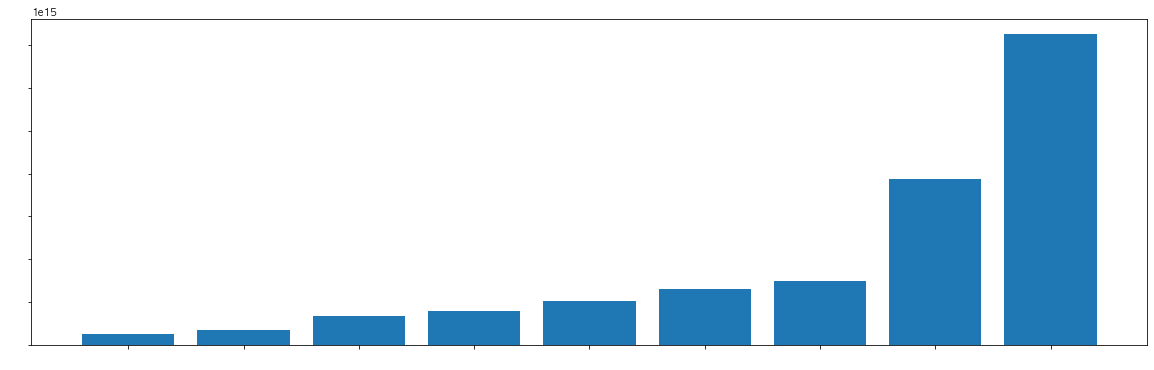

In [74]:
KOSPI = KOSPI_list.loc['2021-12-31'].sort_values()[-10:]
#KOSDAQ = KOSDAQ_list.loc['2022-12-31'].sort_values()[-10:]
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["figure.figsize"] = (20,6)

#plt.xticks(color='w')
#plt.yticks(color='w')
#plt.bar(KOSPI.index.to_list(), KOSPI)
#plt.show()

plt.bar(KOSPI.index.to_list(), KOSPI)
plt.xticks(color='w')
plt.yticks(color='w')
plt.show()

([<matplotlib.patches.Wedge at 0x128489490>,
 [Text(-0.6465637441936393, 0.8899187180267096, '폐업'),
  Text(0.46835712939770546, -0.9953098006863699, ' '),
  Text(1.0735084126331969, -0.23995767961404013, 'M&A'),
  Text(1.0994572127872129, -0.03455195001984181, 'I PO')])

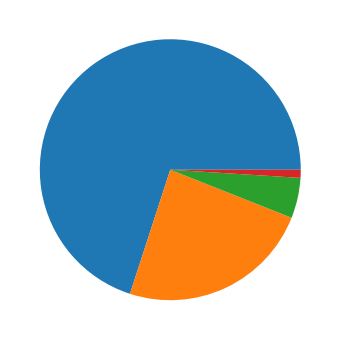

In [35]:
# Start writing code here...
import pandas as pd
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(color='w')
plt.yticks(color='w')
plt.pie( [70, 24, 5, 1], labels=['폐업',' ','M&A','I PO'])